<a href="https://colab.research.google.com/github/codebuzz01/codebuzz_gitquest/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Linear Regression with Python

Your neighbour is looking to sell her house as the property market looks good in the near future. She comes to you to ask for help in predicting housing prices for regions in the US. She asked you if you could use your newly acquired data science skills to create a model that can predict the price of her house with certain features

**Data Dictionary**

Column_Name|Data_Definition
-----|-----
Avg. Area Income|Avg. Income of residents of the city house is located in.
Avg. Area House Age|Avg Age of Houses in same city
Avg. Area Number of Rooms|Avg Number of Rooms for Houses in same city
Avg. Area Number of Bedrooms|Avg Number of Bedrooms for Houses in same city
Area Population|Area Population
Price|Price that the house sold at
Address|Address for the house


In [ ]:
# Please upload the USA_Housing.csv that you have downloaded
from google.colab import files 
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing (1).csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']))

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df.columns.to_list()

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

# EDA

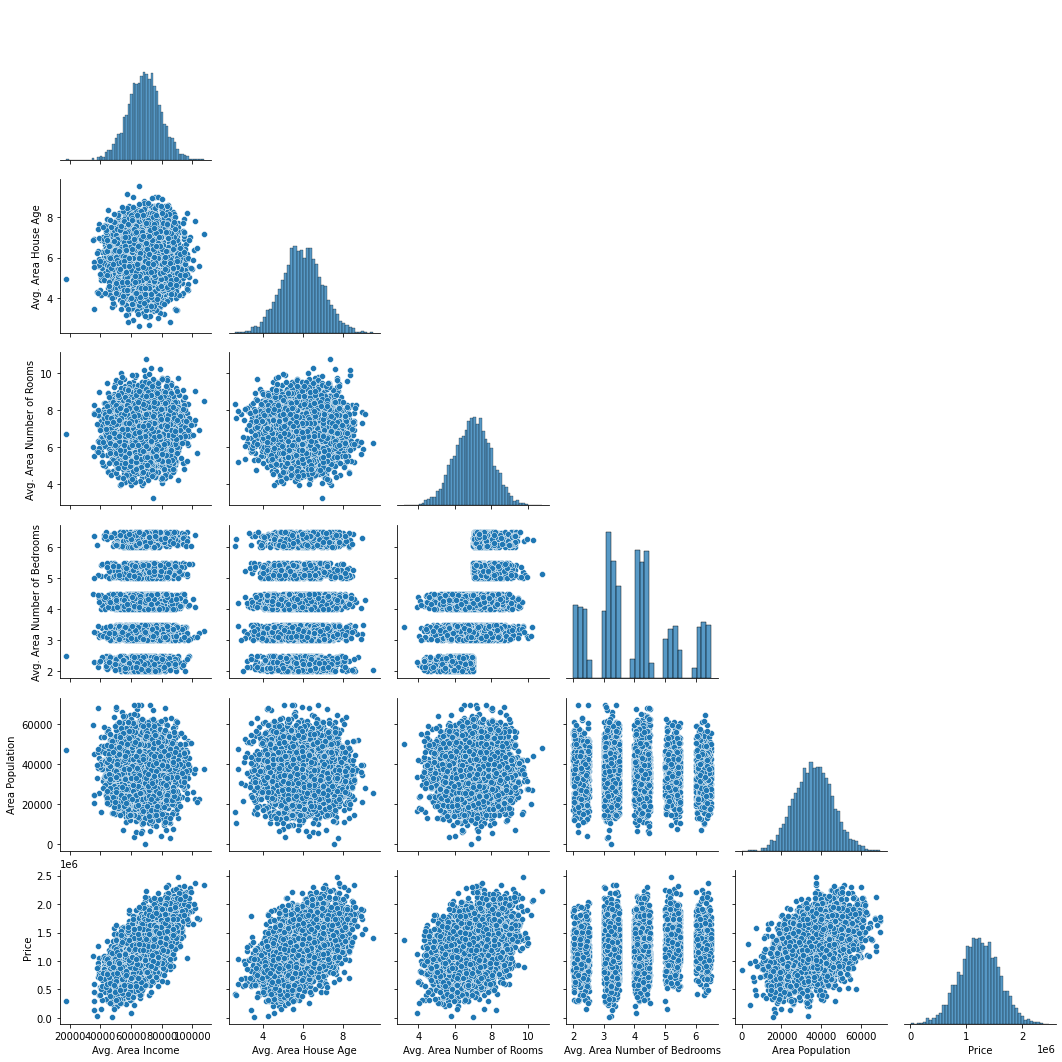

In [ ]:
sns.pairplot(df, corner=True)

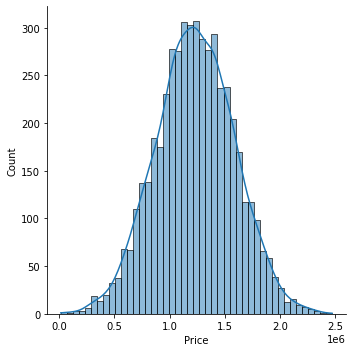

In [ ]:
# Distribution of Prices
sns.displot(x='Price',data=df,kde=True)

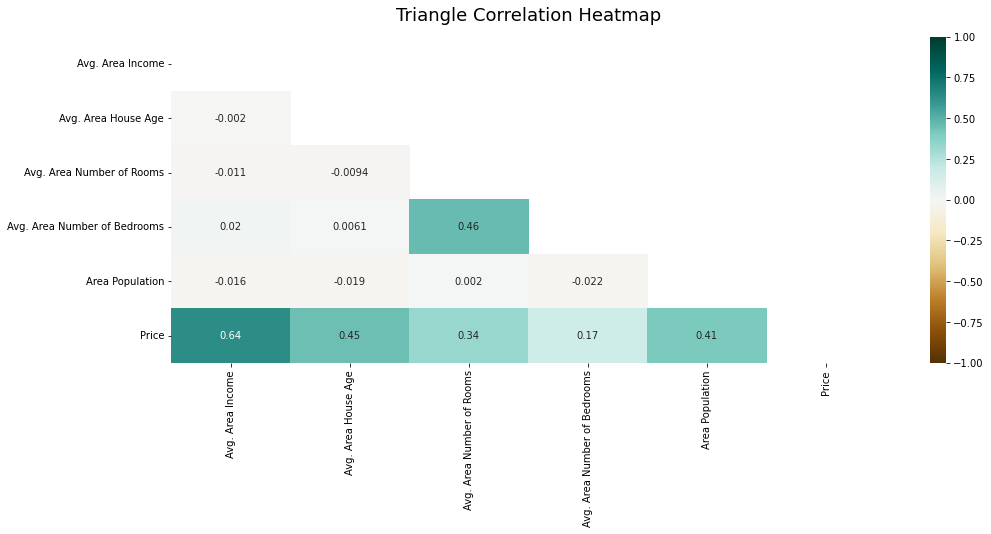

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

# Training the Linear Regression Model

When it comes to training Machine Learning Models, once EDA is completed and the relevant steps decided. The techniques are as follows

## Step 1: Obtaining the x and y data

x are the input variables that are 'determinative' of the y (target) variable

In [ ]:
X = df[['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']]
y = df['Price']

## Step 2: Train-test-split

This splits the dataset into a training set and testing set. This helps ensure that the data is properly split randomly =

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Step 3: Creating the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

## Step 4: Model Evaluation

In [ ]:
lr.score(X_test,y_test)

0.914681849875402

In [ ]:
lr.intercept_

-2638673.4261902785

In [ ]:
pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


## Step 5: Predictions

In [ ]:
predictions = lr.predict(X_test)

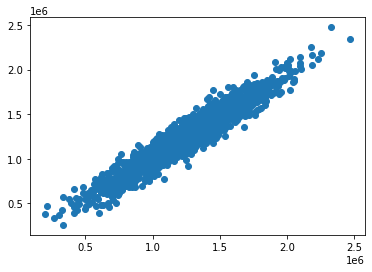

In [ ]:
plt.scatter(y_test,predictions)

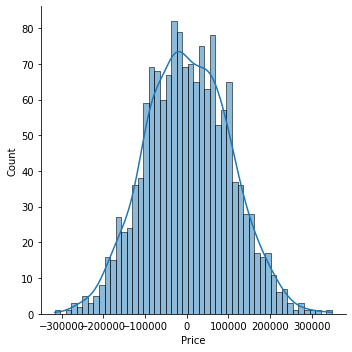

In [ ]:
# Residual Histogram
sns.displot((y_test-predictions),bins=50, kde=True);

## Step 6: Metrics



**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R Square** or the coefficient of determinant is the amount of variation that can be explained by the model:

![](https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSE-and-SST.jpg)

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error. Good for ignoring outlier point in dataset
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R_squared:', r2_score(y_test, predictions))

MAE: 81135.56609336872
MSE: 10068422551.400831
RMSE: 100341.52954485411
R_squared: 0.914681849875402


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
lr.score(X_test, y_test)

0.914681849875402

In [ ]:
cross_val_score(lr, X_test, y_test,cv=3)

array([0.91795726, 0.91776799, 0.9052688 ])

In [ ]:
cross_val_score(lr, X_test, y_test).mean()

0.9126669974630046

In [ ]:
cross_val_predict(lr, X_test, y_test,cv=3)

array([1310389.19902554, 1239287.02860133, 1246724.23865095, ...,
       1466046.80608568, 1480539.6737201 , 1059669.3594982 ])